# Project Team Id: PTID-CDS-JUN-24-1940

# Project Id: PRCP-1021


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Business Case:   
- To Predict the Insurance Higher Premium Cost  than the Insured Person. 

# Domain Analysis: 
●	age: age of primary beneficiary  
●	sex: beneficiary’s gender - female or male  
●	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,           objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9. 
    Below 18.5 -Under Weight, 
    25-29.9 - Over Weight,
    30 or above Obese.
●	children: Number of children covered by health insurance / Number of dependents  
●	smoker: Smoking or non-smoking  
●	region: the beneficiary's residential area in the US; northeast, southeast, southwest, northwest.  
●	charges: Individual medical costs billed by health insurance (to be predicted)  
●	Id: id of beneficiary  


In [48]:
df1 = pd.read_csv(r"C:\Users\podem\Projects_Datamites\Insurance_Cost_Prediction\Datasets_insurance.csv")
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Basic checks

### Finding Duplicates Value:

In [50]:
df1[df1.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [51]:
df =df1.drop_duplicates()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [52]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [54]:
df.info() # Even Children feature is a integer ,it acts as categorical in dataset.

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [55]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [56]:
df.describe(include='O')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [57]:
cat_col=[]
num_col=[]
for i in df.drop("charges",axis=1):
    if len(df[i].unique()) <= 20:
        cat_col.append(i)
    else:
        num_col.append(i)

In [58]:
df.children.dtype

dtype('int64')

In [59]:
df.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [60]:
df1=df[cat_col]
df1

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest
...,...,...,...,...
1333,male,3,no,northwest
1334,female,0,no,northeast
1335,female,0,no,southeast
1336,female,0,no,southwest


In [61]:
df2= df[num_col]
df2

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
...,...,...
1333,50,30.970
1334,18,31.920
1335,18,36.850
1336,21,25.800


# EDA

## Univariate Analysis:

In [62]:
#import sweetviz as sv
#report = sv.analyze(df)
#report.show_html()

 file:///C:/Users/podem/Projects_Datamites/Insurance_Cost_Prediction/SWEETVIZ_REPORT.html

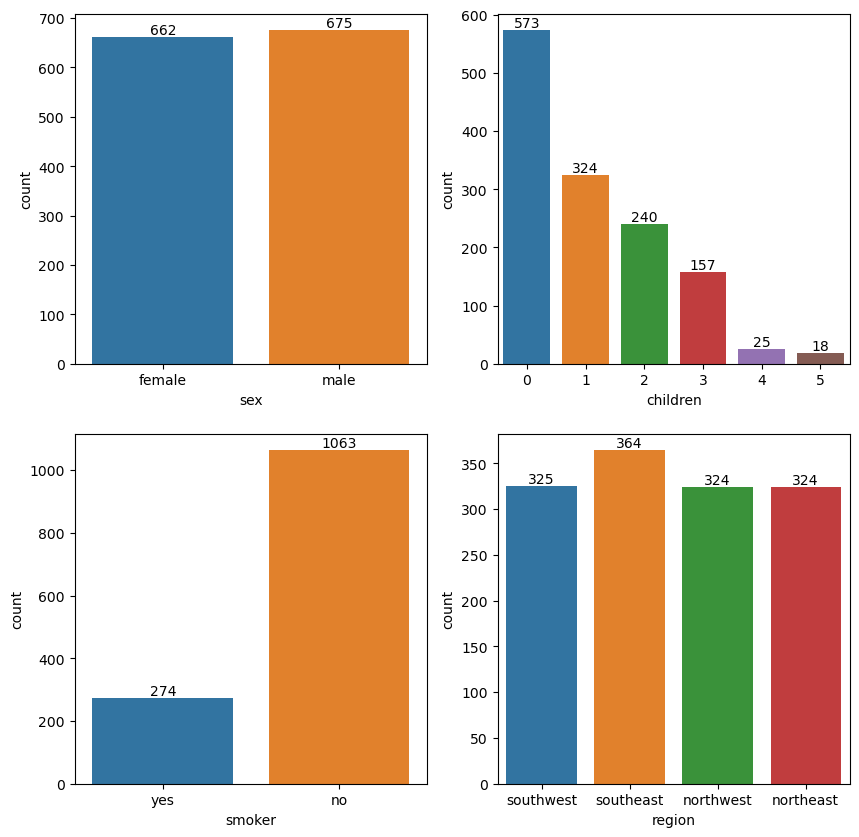

In [63]:
plt.figure(figsize=(10,10))
plot=1

for i in df1:
    plt.subplot(2,2,plot)
    ax=sns.countplot(x=df1[i])
    for j in ax.containers:
        ax.bar_label(j)
    plot+=1    
plt.show()

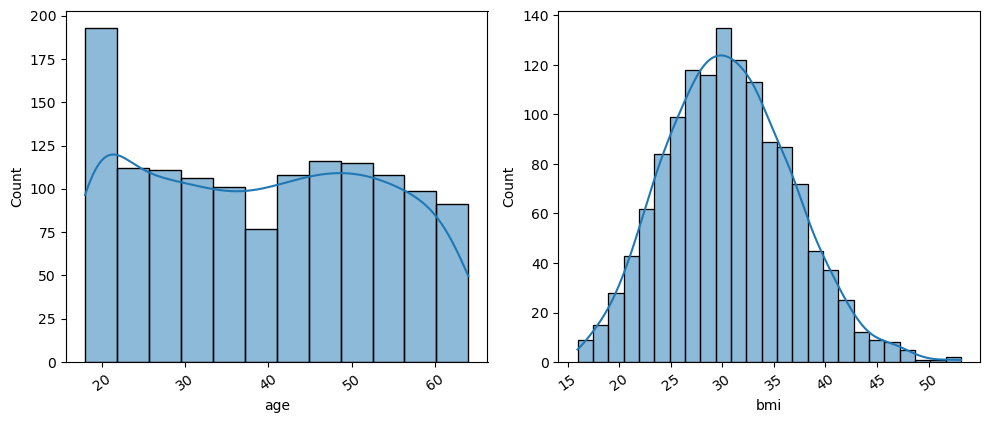

In [64]:
plt.figure(figsize=(10,8))
plot=1
for i in df2:
    plt.subplot(2,2,plot)
    sns.histplot(x=df2[i],kde=True)
    plt.xticks(rotation=35)
    plot+=1
plt.tight_layout()

Insights:
- Male and Female have almost equal ratio.
- Most of Majority Age People in between 18 to 23.
- Majority of People contains BMI is 25 to 37.
- Most of People having Childrens 0 and 1.
- 80% of People are Non-Smokers and 20% of are Smokers.
- Majority of People from Southeast Region.

## Bivariate Analysis:

<Axes: xlabel='age', ylabel='charges'>

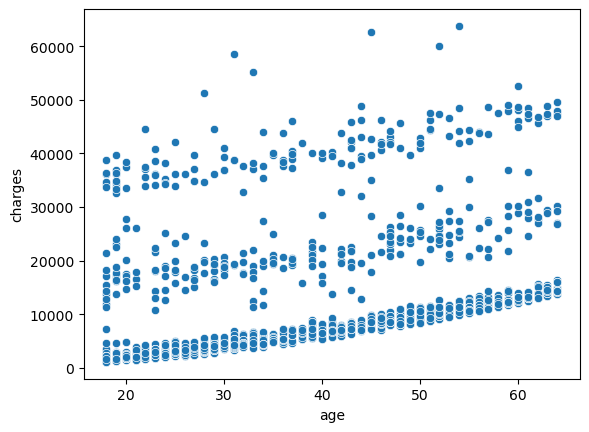

In [65]:
sns.scatterplot(x=df.age,y=df.charges)

<Axes: xlabel='bmi', ylabel='charges'>

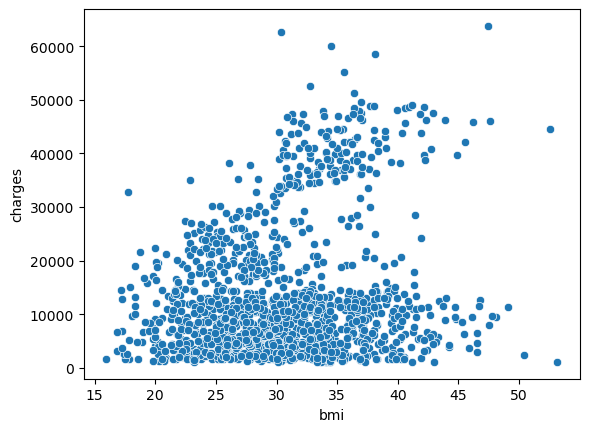

In [66]:
sns.scatterplot(x=df.bmi,y=df.charges)

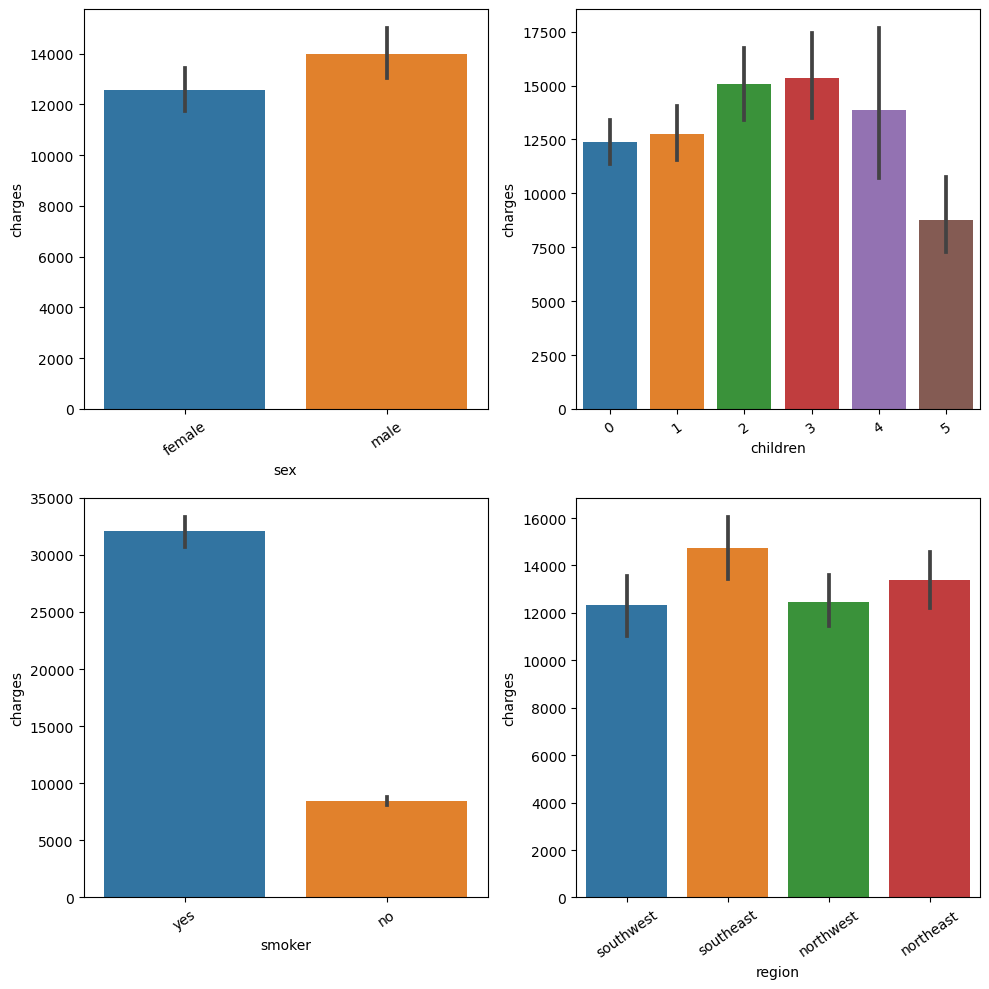

In [67]:
plt.figure(figsize=(10,10))
plotnumber=1

for i in df1:
    plt.subplot(2,2,plotnumber)
    sns.barplot(x=df1[i],y=df.charges)
    plt.xticks(rotation=35)
    for j in ax.containers:
        ax.bar_label(j)
     
    plotnumber+=1
    
plt.tight_layout()

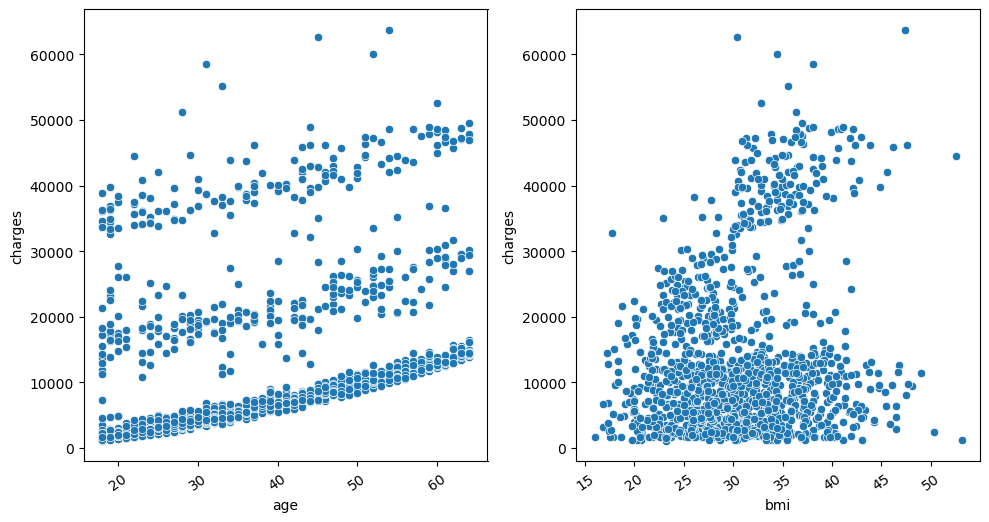

In [68]:
plt.figure(figsize=(10,10))
plotnumber=1

for i in df2:
    plt.subplot(2,2,plotnumber)
    sns.scatterplot(x=df2[i] ,y=df.charges)
    plt.xticks(rotation=35)
    plotnumber+=1
    
plt.tight_layout()

Insights:
- When the age increasing Charges also increasing.
- People who are having  more bmi,they are charging more.
- Male are paying More Charges.
- People who are having 2,3 childrens paying more charges.
- Smoking people in Southeast region  are paying more charges.
- We observed that Smokers-80%, age-30% are paying more charges.

# Data Preprocessing

### Handling with Null values:

In [69]:
df.isnull().sum() #No null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [70]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [71]:
np.where(df.age==0)

(array([], dtype=int64),)

In [72]:
np.where(df.bmi==0)

(array([], dtype=int64),)

In [73]:
np.where(df.charges==0)

(array([], dtype=int64),)

In [74]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [75]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

### Categorical to numerical

In [76]:
df.sex =df.sex.replace({'male':1,'female':0})
df.smoker=df.smoker.replace({'yes':1,'no':0})
df.region=df.region.replace({'southeast':3,'northeast':2,'southwest':1,'northwest':0})

In [77]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,0,21984.47061
4,32,1,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,3,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


<Axes: title={'center': 'correlation with charges'}>

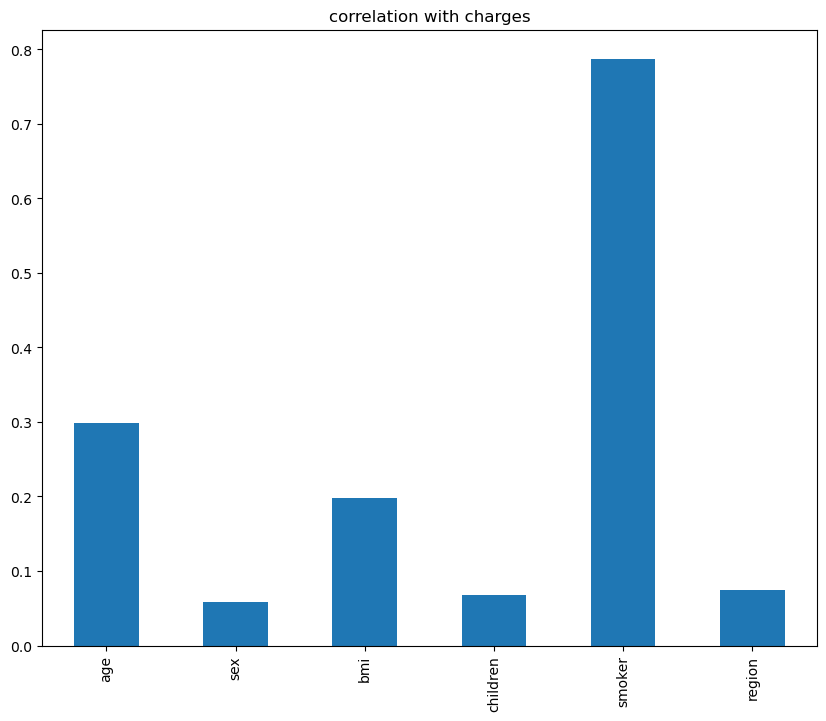

In [78]:
df3 = df.drop('charges',axis=1)
df3.corrwith(df['charges']).plot.bar(figsize =(10,8),title ='correlation with charges') 

Insights:
- We observes correlation between smoker,age and bmi with respect to charges.

### Handling with Outliers:

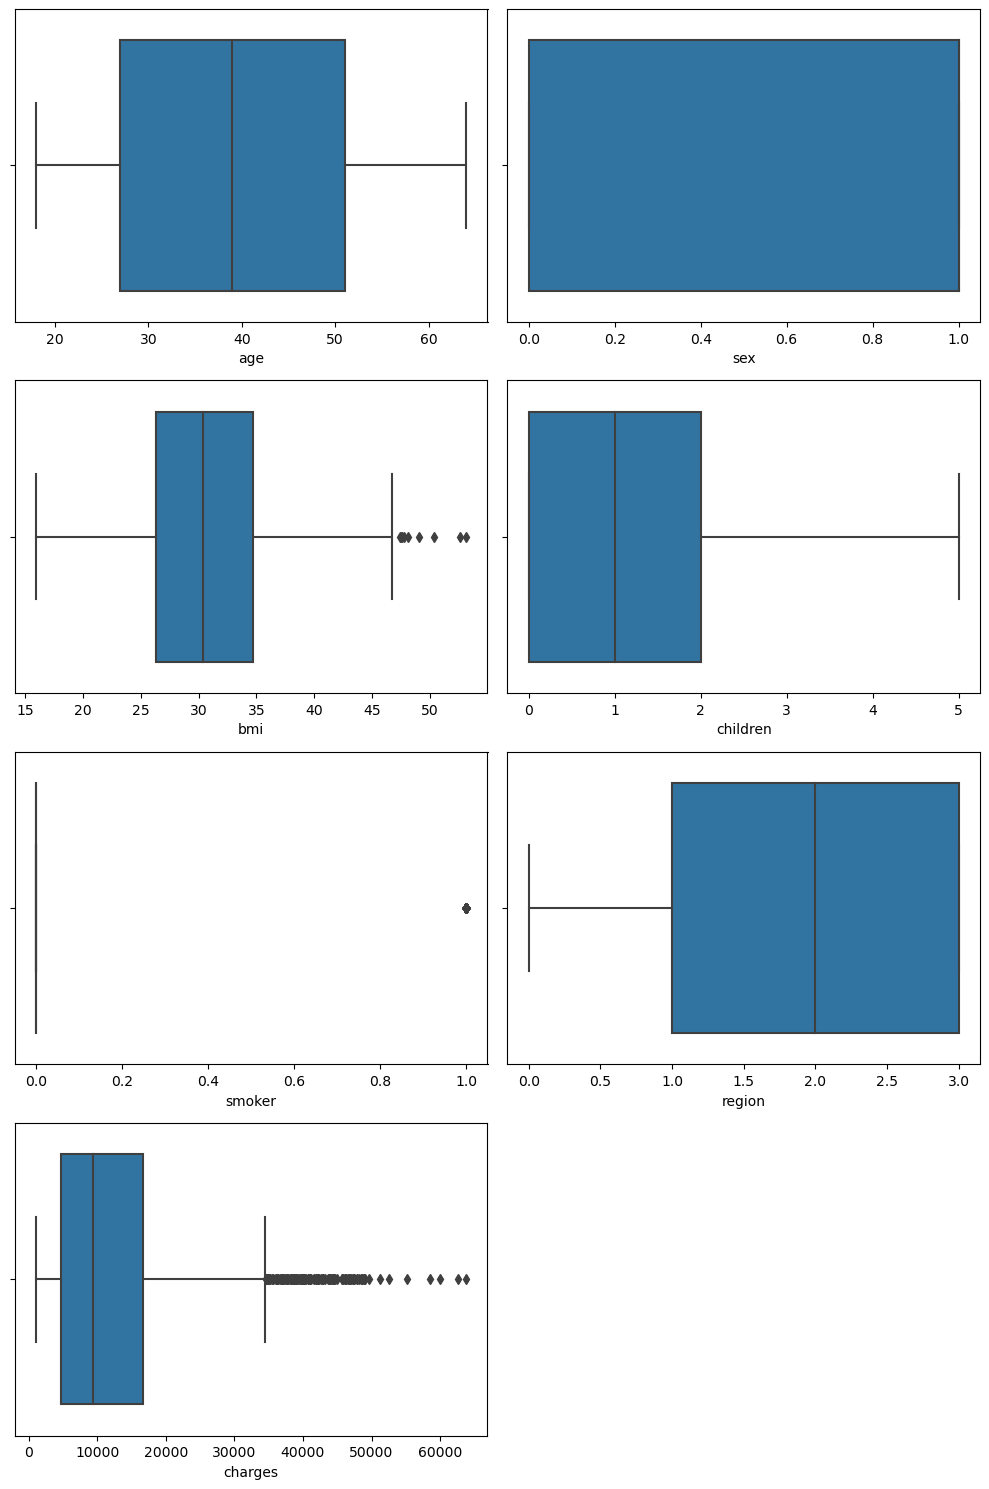

In [79]:
plt.figure(figsize=(10,15))
num=1
for i in df:
    plt.subplot(4,2,num)
    sns.boxplot(x=df[i])
    num+=1
    
plt.tight_layout()

In [80]:
df.loc[df.bmi>45]

,age,sex,bmi,children,smoker,region,charges
116,58,1,49.06,0,0,3,11381.32540
286,46,0,48.07,2,0,2,9432.92530
292,25,1,45.54,2,1,3,42112.23560
401,47,1,47.52,1,0,3,8083.91980
438,52,0,46.75,5,0,3,12592.53450
454,32,1,46.53,2,0,3,4686.38870
543,54,0,47.41,0,1,3,63770.42801
547,54,0,46.70,2,0,1,11538.42100
549,43,0,46.20,0,1,3,45863.20500
582,39,1,45.43,2,0,3,6356.27070


### Scaling

In [81]:
#from sklearn.preprocessing import StandardScaler
#ss= StandardScaler()

In [82]:
#df[['age','bmi']]=ss.fit_transform(df[['age','bmi']])

In [83]:
#df.head()

### Feature Selection

In [84]:
df.drop('charges',axis=1).corr()

,age,sex,bmi,children,smoker,region
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,-0.009556
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.017818
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.211959
children,0.041536,0.017848,0.012755,1.000000,0.007331,-0.037177
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,0.068544
region,-0.009556,0.017818,0.211959,-0.037177,0.068544,1.000000


<Axes: >

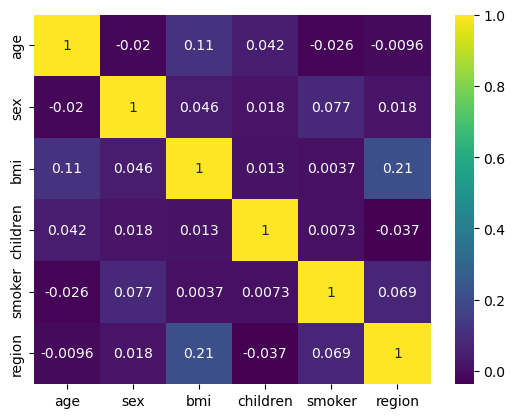

In [85]:

sns.heatmap(df.drop('charges',axis=1).corr(),annot=True,cmap='viridis')


- There is no co-relation between features/columns.

### Model Creation

In [86]:
x = df.drop('charges',axis=1)
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,3
2,28,1,33.000,3,0,3
3,33,1,22.705,0,0,0
4,32,1,28.880,0,0,0


In [87]:
y = df.charges
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [89]:
x_train

,age,sex,bmi,children,smoker,region
763,27,1,26.03,0,0,2
1079,63,1,33.66,3,0,3
178,46,0,28.90,2,0,1
287,63,0,26.22,0,0,0
1290,38,0,19.95,2,0,2
...,...,...,...,...,...,...
1096,51,0,34.96,2,1,2
1131,27,1,45.90,2,0,1
1295,20,1,22.00,1,0,1
861,38,0,28.00,3,0,1


In [90]:
x_test

,age,sex,bmi,children,smoker,region
900,49,1,22.515,0,0,2
1064,29,0,25.600,4,0,1
1256,51,0,36.385,3,0,0
298,31,1,34.390,3,1,0
237,31,1,38.390,2,0,3
...,...,...,...,...,...,...
1014,38,0,27.600,0,0,1
669,40,0,29.810,1,0,3
1109,45,1,20.350,3,0,3
788,29,1,22.515,3,0,2


In [91]:
y_train

763      3070.8087
1079    15161.5344
178      8823.2790
287     14256.1928
1290     7133.9025
           ...    
1096    44641.1974
1131     3693.4280
1295     1964.7800
861      7151.0920
1127     5836.5204
Name: charges, Length: 1002, dtype: float64

In [92]:
y_test

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
           ...     
1014     5383.53600
669      6500.23590
1109     8605.36150
788      5209.57885
1192    13019.16105
Name: charges, Length: 335, dtype: float64

In [93]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1002, 6)
(335, 6)
(1002,)
(335,)


### Scaling:

In [94]:
from sklearn.preprocessing import MinMaxScaler
ms =MinMaxScaler()

In [95]:
sc_xtrain =ms.fit_transform(x_train)
sc_xtrain

array([[0.19565217, 1.        , 0.27091741, 0.        , 0.        ,
        0.66666667],
       [0.97826087, 1.        , 0.47619048, 0.6       , 0.        ,
        1.        ],
       [0.60869565, 0.        , 0.34813021, 0.4       , 0.        ,
        0.33333333],
       ...,
       [0.04347826, 1.        , 0.16249664, 0.2       , 0.        ,
        0.33333333],
       [0.43478261, 0.        , 0.32391714, 0.6       , 0.        ,
        0.33333333],
       [0.36956522, 0.        , 0.53537799, 0.4       , 0.        ,
        1.        ]])

In [96]:
sc_xtest=ms.transform(x_test)
sc_xtest

array([[0.67391304, 1.        , 0.1763519 , 0.        , 0.        ,
        0.66666667],
       [0.23913043, 0.        , 0.25934894, 0.8       , 0.        ,
        0.33333333],
       [0.7173913 , 0.        , 0.54950229, 0.6       , 0.        ,
        0.        ],
       ...,
       [0.58695652, 1.        , 0.118106  , 0.6       , 0.        ,
        1.        ],
       [0.23913043, 1.        , 0.1763519 , 0.6       , 0.        ,
        0.66666667],
       [0.86956522, 0.        , 0.44215765, 0.2       , 0.        ,
        0.66666667]])

### Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [98]:
lr.fit(sc_xtrain,y_train)

LinearRegression()

In [99]:
print(np.asarray(lr.coef_))
print(lr.intercept_)

[ 1.13222816e+04 -1.17049068e+01  1.15543104e+04  2.64275345e+03
  2.30933865e+04 -2.26626302e+02]
-1834.6416077687463


In [100]:
y_pred = lr.predict(sc_xtest)

In [101]:
y_pred

array([ 7670.42707747,  5908.11929507, 14222.63680522, 31761.44068444,
        9156.2788941 , 13313.18852607, 29833.15722766,  1666.85508595,
       10738.23310604, 11326.66474231, 10343.89299789, 33159.37778158,
       30563.14533377, 17389.93420455, 10136.37124935,  9741.13423175,
        4395.82648146, 31960.18462941,  3510.28752665,  5411.67623164,
        3727.89649696, 29805.37490855, 14931.99014602, 30704.81054498,
       31034.13612105,  5453.59650465, 35584.35627567, 36743.95445803,
       10779.8614624 , 13613.74239388,  5909.44513564, 12894.00020367,
         743.4370244 , 12285.4748125 , 39669.28058161, 12410.7851391 ,
        4907.85570901,  3944.94234298, 31170.79427045,  9117.28802504,
        6411.0488727 , 29587.99998162, 34979.59673147, 11732.92231837,
        7354.57654949,  3609.95006429,  5574.15660189,  9105.03585007,
        4256.00766277,  9244.72625254,  6754.09032544, 11469.58913858,
       30683.64277824,  3818.77223144, 11209.76260299,  9962.5058264 ,
      

In [102]:
y_test.values

array([ 8688.85885 ,  5708.867   , 11436.73815 , 38746.3551  ,
        4463.2051  ,  9304.7019  , 38511.6283  ,  2150.469   ,
        7345.7266  , 10264.4421  , 13415.0381  , 24393.6224  ,
       37607.5277  , 13063.883   , 24915.04626 ,  8027.968   ,
        1980.07    , 38709.176   ,  3484.331   ,  3947.4131  ,
        1880.07    , 20773.62775 ,  9800.8882  , 21082.16    ,
       55135.40209 ,  3579.8287  , 43896.3763  , 52590.82939 ,
        9778.3472  , 10736.87075 ,  4347.02335 ,  9048.0273  ,
        1711.0268  , 12333.828   , 63770.42801 ,  9872.701   ,
        4687.797   ,  5693.4305  , 21195.818   ,  8233.0975  ,
        2755.02095 , 19798.05455 , 42124.5153  ,  9964.06    ,
        9193.8385  ,  3161.454   ,  2217.6012  ,  7337.748   ,
        4133.64165 ,  6338.0756  ,  4349.462   ,  5757.41345 ,
       21771.3423  ,  1391.5287  ,  7160.094   ,  7731.4271  ,
        9957.7216  ,  3594.17085 , 38282.7495  ,  7256.7231  ,
       10977.2063  ,  5245.2269  , 11187.6567  ,  1708.

### LR OF TESTING DATA

In [103]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [104]:
mse = mean_squared_error(y_test,y_pred)
mse

35548189.23800397

In [105]:
mae = mean_absolute_error(y_test,y_pred)
mae

4075.219024485973

In [106]:
r2 = r2_score(y_test,y_pred)
r2

0.794411963862124

In [107]:
adjusted_r2= 1-((1-r2)*(335-1))/(335-6-1)
adjusted_r2

0.7906512071035043

In [108]:
import math
rmse = math.sqrt(mse)
rmse

5962.230223498919

### LR OF TRAINING DATA

In [109]:
y_pred_train = lr.predict(sc_xtrain)


In [110]:
lr_r2_tr=r2_score(y_train,y_pred_train)
lr_r2_tr

0.7291356166421123

## By using bagging base estimator is Linear Regressor

In [111]:
from sklearn.ensemble import BaggingRegressor
model_bag = BaggingRegressor(base_estimator=lr,random_state=42,n_estimators=50)
model_bag.fit(sc_xtrain,y_train)

BaggingRegressor(base_estimator=LinearRegression(), n_estimators=50,
                 random_state=42)

### Bagging of Testing

In [112]:
y_pred=model_bag.predict(sc_xtest)
y_pred

array([ 7712.72558884,  5918.93366204, 14291.83219148, 31841.56317417,
        9066.290515  , 13289.24232957, 29657.62211728,  1564.99917803,
       10584.08273288, 11514.78954323, 10441.17075356, 33271.21650593,
       30501.7748054 , 17341.02653779, 10018.32263134,  9841.29273686,
        4367.95958254, 31855.51947951,  3565.47020219,  5234.25586267,
        3481.60453586, 29781.2486583 , 14792.71876059, 30740.53688188,
       30952.29777464,  5406.87476606, 35408.61585055, 36810.2130771 ,
       10717.38206606, 13691.71941996,  5759.94625916, 12851.89509399,
         647.81555235, 12415.69071934, 39458.83049222, 12391.57232398,
        4894.96324401,  4009.93870359, 31161.23494399,  9005.1983176 ,
        6193.90125071, 29551.12538744, 34942.89373706, 11764.78747802,
        7451.55399477,  3522.62641886,  5341.16709527,  9076.04229999,
        4242.18519068,  9207.698876  ,  6582.43801024, 11393.2129846 ,
       30601.5098085 ,  3664.85942335, 11269.90472558,  9949.68748753,
      

In [113]:
r2_bag_lr=r2_score(y_test,y_pred)
r2_bag_lr

0.7941291818865355

### Bagging of Training

In [114]:
y_pred1=model_bag.predict(sc_xtrain)
y_pred1

array([ 3299.46500938, 16154.96315799, 10070.17901421, ...,
         994.49694553,  8349.36595499,  9206.74950579])

In [115]:
r2_bag_lr_tr=r2_score(y_train,y_pred1)
r2_bag_lr_tr

0.7290583315124397

### Support Vector Machines

In [116]:
from sklearn.svm import SVR
sr = SVR(kernel='poly')

In [117]:
sr.fit(sc_xtrain,y_train)

SVR(kernel='poly')

### SVR TESTING DATA

In [118]:
y_pred_sr = sr.predict(sc_xtest)
y_pred_sr

array([ 9401.26513396,  8629.31762166,  8898.87320795, 11768.52822444,
        8962.06937682,  9985.1796536 , 10398.08522179,  8556.54847403,
        9032.01962179,  9283.95097403,  8812.3807266 , 12165.38831493,
       12944.43627994,  9296.25818599,  8773.94065112,  9235.10652856,
        8559.36586392, 14313.28411373,  8654.0664274 ,  8668.16831636,
        8542.74046177, 12957.75523217,  9391.39770756, 12330.7288732 ,
        9468.53076792,  8559.89212633, 12262.72739239, 14048.97815435,
        8997.83997778,  9796.07434534,  8644.78668656,  9976.90088634,
        8463.14234213,  9801.37442518, 13118.35771801,  8925.98522891,
        8574.89906884,  8579.09265475, 14830.3479579 ,  9047.72807356,
        8570.59164554, 10673.38534662, 15611.14484769,  9708.46954655,
        8664.24103969,  8577.5891091 ,  8539.01003449,  8742.39019012,
        8564.80423157,  9298.18418145,  8677.52137089,  9210.31356103,
       10697.67071841,  8515.76212031,  9203.23581993,  9551.07008989,
      

In [119]:
mse=mean_squared_error(y_test,y_pred_sr)
mse

157013867.29275778

In [120]:
mae = mean_absolute_error(y_test,y_pred_sr)
mae

8029.412455301547

In [121]:
r2_sr =r2_score(y_test,y_pred_sr)
r2_sr

0.0919320135546885

In [122]:
adjusted_r2_svr= 1-((1-r2_sr)*(335-1))/(335-6-1)
adjusted_r2_svr

0.07532101380264011

### SVR TRAINING DATA

In [125]:
y_pred_svr=sr.predict(sc_xtrain)

In [126]:
r2_sr_tr=r2_score(y_train,y_pred_svr)
r2_sr_tr

0.10812932889864035

- SVR model  is performing worse than a simple mean predictor.

### K_Nearest Neighbour

In [127]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(sc_xtrain,y_train)

KNeighborsRegressor(n_neighbors=3)

### KNN TESTING DATA

In [128]:
y_pred_knn = knn.predict(sc_xtest)
y_pred_knn

array([ 8873.87071667,  5324.91866667, 11152.81133333, 25001.97549667,
        4771.938     ,  8161.89323333, 45290.94999333,  2067.60766667,
        7551.88813333, 10163.44633333, 18729.98459   , 32966.39221667,
       33761.20168333, 11273.014     , 11043.23127333,  7765.18166667,
        2387.854     , 33288.34816667,  6497.21661333,  3964.6361    ,
        5127.03885   , 27497.80745   ,  9787.63356667, 27202.56466667,
       32695.42628333, 18333.84887   , 43586.28350333, 44537.06095   ,
        9897.32298333, 10372.6018    ,  4266.00038333,  9113.7068    ,
        4908.75872667, 10317.52866667, 44753.23563667,  9594.128     ,
       11245.74011333,  4979.43868333, 22886.72363333,  7454.86866667,
        2442.69641667, 20847.71556667, 43674.6113    ,  9180.74225   ,
        8369.02886667,  8427.54339   ,  2442.69641667,  6774.49633333,
        4622.8641    , 12102.55072667,  4922.75196667,  6770.04631667,
       22009.912     ,  1136.96003333,  6807.701     , 13233.84386   ,
      

In [129]:
x_test

,age,sex,bmi,children,smoker,region
900,49,1,22.515,0,0,2
1064,29,0,25.600,4,0,1
1256,51,0,36.385,3,0,0
298,31,1,34.390,3,1,0
237,31,1,38.390,2,0,3
...,...,...,...,...,...,...
1014,38,0,27.600,0,0,1
669,40,0,29.810,1,0,3
1109,45,1,20.350,3,0,3
788,29,1,22.515,3,0,2


In [130]:
 mse=mean_squared_error(y_test,y_pred_knn)
mse

33020657.32212457

In [131]:
knn_r2 = r2_score(y_test,y_pred_knn)
knn_r2

0.809029595139554

In [132]:
adjusted_r2_knn= 1-((1-knn_r2)*(335-1))/(335-6-1)
adjusted_r2_knn

0.8055362340750336

### KNN TRAINING DATA

In [133]:
y_knn_pred=knn.predict(sc_xtrain)

In [134]:
knn_r2_tr=r2_score(y_train,y_knn_pred)
knn_r2_tr

0.8651743205448327

-  knn getting less of r2_score

### DECISION TREE

In [135]:
from sklearn.tree import DecisionTreeRegressor
dr =DecisionTreeRegressor(random_state=42)
dr.fit(sc_xtrain,y_train)

DecisionTreeRegressor(random_state=42)

In [136]:
y_pred_dr = dr.predict(sc_xtest)
y_pred_dr

array([ 9361.3268 ,  6059.173  , 10848.1343 , 36837.467  ,  4266.1658 ,
        8978.1851 , 37484.4493 ,  2154.361  , 19144.57652, 10269.46   ,
       13012.20865, 23065.4207 , 36837.467  , 13470.86   ,  6082.405  ,
        8615.3    ,  2416.955  , 37742.5757 , 24671.66334,  4527.18295,
       23082.95533, 20984.0936 ,  8978.1851 , 20009.63365, 40273.6455 ,
       17128.42608, 42560.4304 , 43921.1837 ,  9583.8933 , 26392.26029,
        3757.8448 ,  9058.7303 ,  2201.0971 , 13112.6048 , 48675.5177 ,
        9880.068  ,  4915.05985,  5312.16985, 22412.6485 ,  8240.5896 ,
        2217.46915, 19964.7463 , 40273.6455 ,  9290.1395 ,  7526.70645,
        3558.62025,  1634.5734 ,  7727.2532 ,  4337.7352 , 23563.01618,
        5138.2567 ,  6474.013  , 23401.30575,  1880.487  ,  7729.64575,
        8219.2039 ,  9617.66245,  3208.787  , 40273.6455 ,  6710.1919 ,
       10381.4787 ,  5246.047  , 27322.73386,  1705.6245 , 20462.99766,
       12094.478  ,  4762.329  , 23065.4207 , 17178.6824 , 14235

In [137]:
mse=mean_squared_error(y_test,y_pred_dr)
mse

41689102.95203267

In [138]:
dr_r2=r2_score(y_test,y_pred_dr)
dr_r2

0.7588968386863642

In [139]:
adjusted_r2_dt= 1-((1-dr_r2)*(335-1))/(335-6-1)
adjusted_r2_dt

0.7544864150037977

### hyper parameter tuning for decision tree

In [140]:
from sklearn.model_selection import GridSearchCV


In [141]:
param_grid = {'max_depth': [None, 5, 10, 15, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(dr, param_grid, cv=5, scoring='r2')

In [142]:
grid_search.fit(sc_xtrain,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [143]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [144]:
DT =DecisionTreeRegressor(max_depth=5,min_samples_leaf=4,min_samples_split=2)

In [145]:
DT.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=5, min_samples_leaf=4)

### DECISION TREE TESTING DATA

In [146]:
dr_gr_pred = DT.predict(sc_xtest)
dr_gr_pred

array([ 1816.90990488,  5146.897646  ,  5146.897646  , 15115.68059778,
        1816.90990488,  1816.90990488, 15115.68059778,  1816.90990488,
        1816.90990488,  5146.897646  ,  1816.90990488, 15115.68059778,
       15115.68059778,  1816.90990488,  1816.90990488,  1816.90990488,
        1816.90990488, 15115.68059778,  1816.90990488,  1816.90990488,
        1816.90990488, 15115.68059778,  1816.90990488, 15115.68059778,
       15115.68059778,  1816.90990488, 15115.68059778, 15115.68059778,
        1816.90990488,  5146.897646  ,  1816.90990488,  1816.90990488,
        1816.90990488,  1816.90990488, 15115.68059778,  1816.90990488,
        5146.897646  ,  5146.897646  , 15115.68059778,  1816.90990488,
        1816.90990488, 15115.68059778, 15115.68059778,  1816.90990488,
        1816.90990488,  1816.90990488,  1816.90990488,  1816.90990488,
        1816.90990488,  1816.90990488,  1816.90990488,  1816.90990488,
       15115.68059778,  1816.90990488,  1816.90990488,  1816.90990488,
      

In [147]:
mse=mean_squared_error(y_test,dr_gr_pred)
mse

168153292.60482866

In [148]:
dr_gr_r2 = r2_score(y_test,dr_gr_pred)
dr_gr_r2

0.027508687846585778

In [149]:
adjusted_r2_dt_hyp= 1-((1-dr_gr_r2)*(335-1))/(335-6-1)
adjusted_r2_dt_hyp

0.009719212624267115

### DECISION TREE TRAINING DATA

In [152]:
y_pred_dt=DT.predict(sc_xtrain)

In [153]:
dt_r2_tr = r2_score(y_train,y_pred_dt)
dt_r2_tr

0.007866559243110305

In [154]:
# Graphical Representation For Decision tree

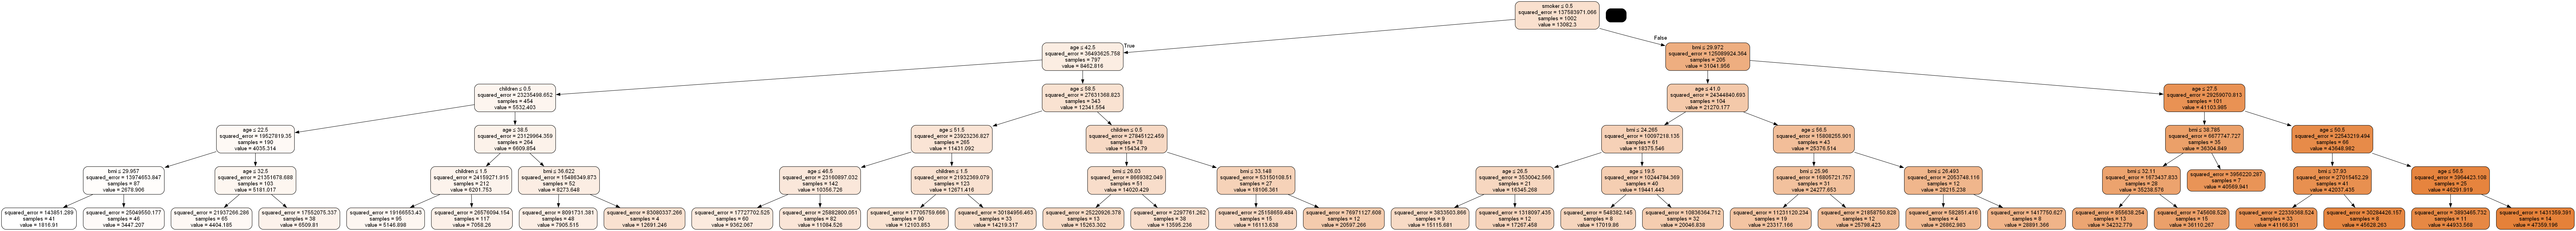

In [155]:
!pip install graphviz
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import pydotplus

# Assuming `DT` is your trained Decision Tree model and `df.columns[:-1]` are your feature names
feature_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
target_name = 'charges'

# Export the decision tree to a dot file
dot_data = export_graphviz(DT, out_file=None, feature_names=feature_names, class_names=[target_name], 
                           filled=True, rounded=True, special_characters=True)

# Create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the graph
Image(graph.create_png())


### Bagging Using Decision Tree

In [156]:
from sklearn.ensemble import BaggingRegressor
model1=BaggingRegressor(base_estimator=DT,n_estimators=100,random_state=42)
model1.fit(sc_xtrain,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5,
                                                      min_samples_leaf=4),
                 n_estimators=100, random_state=42)

### Testing score of Bagging

In [157]:
y_pred =model1.predict(sc_xtest)
y_pred

array([11144.83620471,  8289.03702653, 12012.46812802, 39957.86842635,
        5919.890847  , 10701.51561786, 37492.27802676,  2729.20247058,
        8685.66758603, 11466.93122615, 14937.28187678, 25543.16308727,
       40207.93206348, 14329.78360189,  6328.57718115,  9413.81669704,
        4448.00046152, 40491.23768204,  6618.52979882,  5347.26428739,
        3144.13918295, 19989.66803585, 11124.47546547, 20342.25504087,
       40536.75719011,  8664.15371806, 44200.70074336, 45638.85223784,
       11071.65516856, 10796.43387653,  4846.79217229, 10523.53634019,
        3783.40292372, 15213.43590769, 46806.77281043, 11000.09843114,
        8264.40579005,  6941.80673453, 25075.93779228, 10026.30763341,
        3142.83869815, 21650.28218713, 41665.87396293, 10703.99118342,
        9663.12872365,  4790.41646159,  3106.17388481,  8457.13639651,
        5566.02530124,  7696.08910475,  6062.78734705,  8306.51107547,
       22895.69722907,  3076.61822262,  7923.29840861,  9468.98034687,
      

In [158]:
DT_bagg=r2_score(y_test,y_pred)
DT_bagg

0.8907972899828346

In [159]:
mse=mean_squared_error(y_test,y_pred,multioutput='uniform_average')
mse

18882220.356391087

### Training Score of Bagging

In [160]:
y_pred1 = model1.predict(sc_xtrain)
y_pred1

array([ 4461.92932321, 19638.44342098, 10000.96697999, ...,
        3939.70444149,  6933.63994371,  6205.76874335])

In [161]:
DT_bagg_tr=r2_score(y_train,y_pred1)
DT_bagg_tr

0.8760379456285079

In [162]:
mse = mean_squared_error(y_train,y_pred1,multioutput='uniform_average')
mse

17055191.701931443

### RANDOM FOREST

In [163]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)

In [164]:
rf.fit(sc_xtrain,y_train)

RandomForestRegressor()

In [165]:
rf_pred = rf.predict(sc_xtest)
rf_pred

array([ 9109.1834815,  9542.9401593, 11341.1720973, 41497.0531726,
        6358.2211704,  9918.4658195, 37356.9378674,  2543.288925 ,
       10800.2820752, 11114.1680832, 14426.4391635, 24864.8608866,
       41644.6567984, 14678.496065 ,  6408.8115193,  9082.0146396,
       11197.3202324, 39304.1227997,  6536.8980736,  4440.2111639,
        8945.8605052, 20417.9812385, 10004.0896749, 21147.0732784,
       39607.3474091, 19858.3232704, 43292.2076622, 45649.0492785,
       10452.3397071, 12471.023868 ,  4144.4425282,  9517.3823673,
        3473.2458386, 13425.8501109, 47568.2065142,  9798.530786 ,
        9917.9767075,  5457.3183145, 24127.0415277, 10218.7053633,
        3012.0252655, 20553.6276065, 41650.1309595,  9654.0395746,
        9516.8485975,  4298.284759 ,  3269.535609 ,  7837.6005686,
        6716.6628596, 13522.4418773,  4411.9408346,  6775.0369016,
       22129.9666975,  5274.0263987,  7625.777173 , 12673.0524779,
       10701.996946 ,  4769.6433323, 40232.7566273,  7161.6271

In [166]:
mse=mean_squared_error(y_test,rf_pred)
mse

22745508.99312536

In [167]:
rf_r2 = r2_score(y_test,rf_pred)
rf_r2

0.8684544944457033

In [168]:
adjusted_r2_rf= 1-((1-rf_r2)*(335-1))/(335-6-1)
adjusted_r2_rf

0.8660481742221491

### Hyper parameter tuning for Random Forest

In [169]:
from sklearn.model_selection import RandomizedSearchCV

In [170]:
from scipy.stats import randint

In [171]:
random_grid = {'n_estimators': randint(50, 200),  
    'max_features': ['auto', 'sqrt'],  
    'max_depth': [100,200],  
    'min_samples_split': randint(2, 20),  
    'min_samples_leaf': randint(1, 20)}

In [172]:
rf1 =RandomizedSearchCV(rf,param_distributions=random_grid,scoring='r2',cv=5)

In [173]:
rf1.fit(sc_xtrain,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [100, 200],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000279D10E27D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000279D11B20D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000279D0DAA010>},
                   scoring='r2')

In [174]:
rf1.best_params_

{'max_depth': 200,
 'max_features': 'auto',
 'min_samples_leaf': 9,
 'min_samples_split': 16,
 'n_estimators': 64}

In [175]:
RF=RandomForestRegressor(max_depth=200,max_features='auto',min_samples_leaf=9,min_samples_split=16,n_estimators=64)
RF.fit(sc_xtrain,y_train)

RandomForestRegressor(max_depth=200, max_features='auto', min_samples_leaf=9,
                      min_samples_split=16, n_estimators=64)

### RANDOM FOREST TESTING DATA

In [176]:
y_RF_pred=RF.predict(sc_xtest)
y_RF_pred

array([10641.7727653 ,  6901.26164936, 12067.74797464, 39913.86542544,
        5291.97592428, 10708.11696933, 38735.8444025 ,  2442.76705855,
        9194.11340071, 12243.21176095, 14922.12027347, 26602.60050576,
       39893.57551928, 14372.7903852 ,  6530.07149417, 10111.61820023,
        4936.17522171, 40581.70485213,  7018.24645375,  5318.09815924,
        4894.96022017, 20221.78616488, 10914.46744281, 20227.02267483,
       41086.203886  ,  9550.72175962, 43633.33041444, 45589.20413051,
       10969.03539468, 11157.907016  ,  4253.75077829, 10051.71625043,
        3620.37828041, 15369.49884521, 46345.50937038, 10426.24409824,
        7503.75976671,  6906.58172217, 24697.53804773,  9950.8939851 ,
        2718.36218438, 21762.58769146, 42149.1846981 ,  9878.42042238,
        9758.62918243,  4188.35418131,  2867.58964409,  8174.74380017,
        5283.65960363,  8071.98684959,  5485.89103197,  8374.94696382,
       22739.59574169,  4742.73425459,  8126.66496216, 10346.18022155,
      

In [177]:
mse=mean_squared_error(y_test,y_RF_pred)
mse

19410577.45657203

In [178]:
RF_r2=r2_score(y_test,y_RF_pred)
RF_r2

0.8877416097658075

In [179]:
adjusted_r2_rf_hyp= 1-((1-RF_r2)*(335-1))/(335-6-1)
adjusted_r2_rf_hyp

0.8856881026273772

### RANDOM FOREST TRAINING DATA

In [180]:
y_pred_rf =RF.predict(sc_xtrain)
y_pred_rf

array([ 3122.67878989, 18603.33502478, 10361.25235442, ...,
        2660.51571358,  7401.66120756,  6240.55917301])

In [181]:
RF_r2_tr=r2_score(y_train,y_pred_rf)
RF_r2_tr

0.883081970548821

### Bagging using Random Forest

In [182]:
from sklearn.ensemble import BaggingRegressor
model2=BaggingRegressor(base_estimator=RF,n_estimators=100,random_state=42)
model2.fit(sc_xtrain,y_train)

BaggingRegressor(base_estimator=RandomForestRegressor(max_depth=200,
                                                      max_features='auto',
                                                      min_samples_leaf=9,
                                                      min_samples_split=16,
                                                      n_estimators=64),
                 n_estimators=100, random_state=42)

### Testing Score of Bagging

In [183]:
y_pred=model2.predict(sc_xtest)
y_pred

array([11053.4138724 ,  6865.53816427, 12264.49479176, 40022.23093362,
        5714.10727297, 11075.03351564, 37658.55427517,  2645.73477206,
        8907.09018934, 12053.45684173, 15077.82835552, 26029.25668901,
       40057.96490625, 15091.48339416,  6794.52259999,  9808.28679167,
        5086.74010062, 40995.73126554,  6806.0557418 ,  5148.2264463 ,
        3920.53620983, 19920.89960702, 11508.87126926, 20358.48975997,
       40663.25481765,  8133.38826699, 42837.14931309, 44758.06491331,
       11078.40412526, 11326.13326802,  4523.65735296, 10353.30516541,
        3831.1760448 , 14960.55524819, 46021.07830721, 10627.76503689,
        7653.11678214,  7126.67078688, 25469.37114587,  9981.15577889,
        3039.32978088, 22344.37023854, 42424.91677799, 10113.23307314,
        9914.616979  ,  4446.71559103,  3082.32034403,  8226.85339833,
        5548.66556165,  8255.69273144,  6018.87857421,  7969.58592866,
       23026.26811969,  3561.06257254,  8491.33159549,  9942.97004565,
      

In [184]:
RF_bagg =r2_score(y_test,y_pred)
RF_bagg

0.8889852665999877

In [185]:
mse=mean_squared_error(y_test,y_pred,multioutput='uniform_average')
mse

19195536.983794104

### Training Score of Bagging

In [186]:
y_pred1=model2.predict(sc_xtrain)
y_pred1

array([ 3620.15293435, 16887.38391968, 10174.13511576, ...,
        3566.95536764,  7345.55816971,  6475.46845949])

In [187]:
mse=mean_squared_error(y_train,y_pred1)
mse

17621487.791229937

In [188]:
RF_bagg_tr =r2_score(y_train,y_pred1)
RF_bagg_tr

0.8719219422531819

### GRADIENT BOOSTING

In [189]:
from sklearn.ensemble import GradientBoostingRegressor

In [190]:
gr = GradientBoostingRegressor(loss='squared_error',
    n_estimators=100,
    criterion='friedman_mse',
    min_samples_split=4,
    min_samples_leaf=1,
    max_depth=3,
                               
)
gr.fit(sc_xtrain,y_train)

GradientBoostingRegressor(min_samples_split=4)

### TESTING DATA FOR GB

In [191]:
y_gr_prd = gr.predict(sc_xtest)
y_gr_prd

array([10088.56159745,  7949.07724613, 12701.12508428, 38893.08767985,
        6660.61483008, 11465.77520551, 39886.99670733,  5270.2025109 ,
       10066.17535547, 11159.08672818, 13647.17843399, 25037.47764975,
       39097.4062827 , 14620.88770939,  9354.09776476,  8646.79532274,
        4386.76800006, 39660.47649911,  5373.46683575,  6152.25150691,
        3725.49160107, 19889.28504743, 10103.57304916, 20889.31967644,
       39395.96414151,  6993.04801524, 43577.34758234, 44704.85877596,
       11417.25071797, 13867.41695182,  4857.62139779, 10577.81236446,
        3347.59034989, 15469.5060595 , 46392.02675633, 10938.7483536 ,
        6548.24554717,  5699.67742996, 22032.32428433,  9560.91698031,
        3172.19463082, 21498.51368117, 41911.40534781, 10837.20261031,
        8304.45422902,  4399.86105448,  4003.3262683 ,  8765.77600946,
        5455.38423803,  7842.50712749,  7094.66070112,  6350.76169897,
       23928.03380775,  3449.84533797,  8548.89950028,  9429.52808834,
      

In [192]:
mse=mean_squared_error(y_test,y_gr_prd)
mse

20286230.772594035

In [193]:
gr_r2 = r2_score(y_test,y_gr_prd)
gr_r2

0.8826773899155845

In [194]:
adjusted_r2_gb= 1-((1-gr_r2)*(335-1))/(335-6-1)
adjusted_r2_gb

0.8805312446091623

### TRAINING DATA FOR GB

In [195]:
y_gr_prd_tr = gr.predict(sc_xtrain)
y_gr_prd_tr

array([ 4133.01521341, 17011.06450065,  9027.38512314, ...,
        2771.34592664,  7839.79883191,  7646.2264642 ])

In [196]:
r2_gr_tr = r2_score(y_train,y_gr_prd_tr)
r2_gr_tr

0.8946711612908453

In [197]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

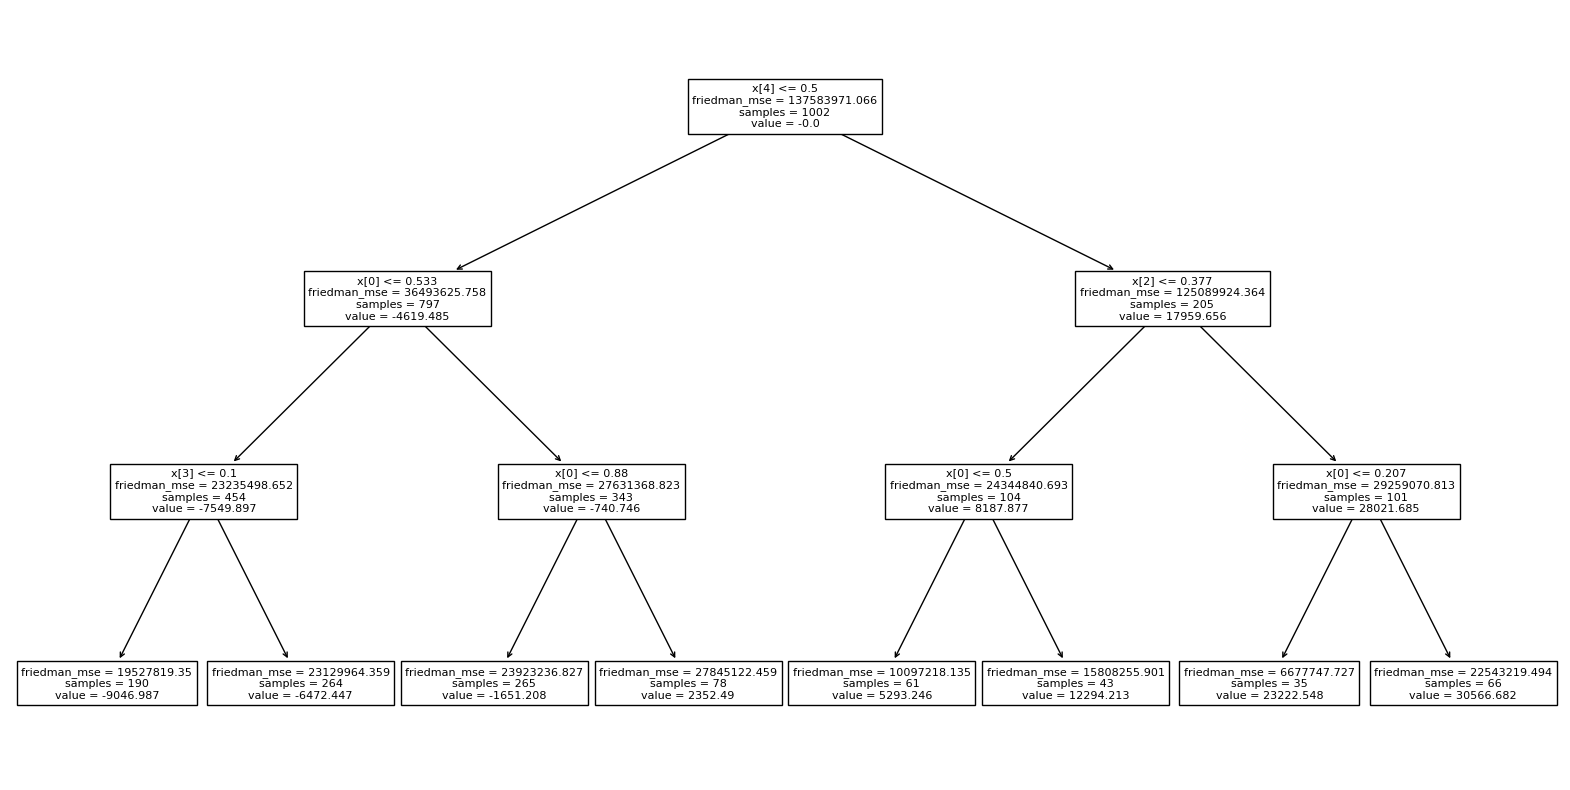

In [198]:
from sklearn.tree import plot_tree
import pickle
save_xgb=pickle.dumps(gr)
model = pickle.loads(save_xgb)
model.predict(x_test)
plt.figure(figsize=(20,10))
plot_tree(gr.estimators_[0,0])
plt.show()


### Neural Networks[MLP Regressor]

In [199]:
from sklearn.neural_network import MLPRegressor
neural =MLPRegressor( hidden_layer_sizes=(60,2),
                       learning_rate_init=0.5,
                       max_iter=100,
                       activation='relu',
                     solver='adam',
                       random_state=42)
neural.fit(x_train,y_train)

MLPRegressor(hidden_layer_sizes=(60, 2), learning_rate_init=0.5, max_iter=100,
             random_state=42)

#### Testing data of MLP Regressor

In [200]:
y_pred = neural.predict(sc_xtest)
y_pred

array([-7.75975081e-01, -7.75975081e-01, -7.75975081e-01,  1.97402654e+04,
       -7.75975081e-01, -7.75975081e-01,  1.95327275e+04, -7.75975081e-01,
       -7.75975081e-01, -7.75975081e-01, -7.75975081e-01,  1.93529003e+04,
        1.90408506e+04, -7.75975081e-01, -7.75975081e-01, -7.75975081e-01,
       -7.75975081e-01,  1.88694218e+04, -7.75975081e-01, -7.75975081e-01,
       -7.75975081e-01,  1.90260183e+04, -7.75975081e-01,  1.92431815e+04,
        1.96781246e+04, -7.75975081e-01,  1.94480827e+04,  1.92249269e+04,
       -7.75975081e-01, -7.75975081e-01, -7.75975081e-01, -7.75975081e-01,
       -7.75975081e-01, -7.75975081e-01,  1.92521546e+04, -7.75975081e-01,
       -7.75975081e-01, -7.75975081e-01,  1.87158663e+04, -7.75975081e-01,
       -7.75975081e-01,  1.95286959e+04,  1.92067239e+04, -7.75975081e-01,
       -7.75975081e-01, -7.75975081e-01, -7.75975081e-01, -7.75975081e-01,
       -7.75975081e-01, -7.75975081e-01, -7.75975081e-01, -7.75975081e-01,
        1.94117482e+04, -

In [204]:
MLP_r2 =r2_score(y_test,y_pred)
MLP_r2

0.055698555195686894

#### Training Data of MLP Regressor

In [201]:
y_pred1 = neural.predict(sc_xtrain)
y_pred1

array([-0.77597508, -0.77597508, -0.77597508, ..., -0.77597508,
       -0.77597508, -0.77597508])

In [202]:
MLP_r2_tr=r2_score(y_train,y_pred1)
MLP_r2_tr

-0.016463498034037016

# Overall performance of  Regression models

In [205]:
models =pd.DataFrame ({
    'Models':['Linear Regression MODEL','Linear Regression_Bagging Model','SVR MODEL','KNN MODEL','Decision Tree MODEL',
              'Decision Tree_Bagging MODEL','Random Forest Model','Random Forest_Bagging Model','GB Model','MLP Regressor'],
      'Training(R2)':[lr_r2_tr,r2_bag_lr_tr,r2_sr_tr,knn_r2_tr,dt_r2_tr,DT_bagg,RF_r2_tr,RF_bagg_tr,r2_gr_tr,MLP_r2_tr],
       'Testing(R2)':[r2,r2_bag_lr,r2_sr,knn_r2,dr_gr_r2,DT_bagg,RF_r2,RF_bagg,gr_r2,MLP_r2]})

In [206]:
models

,Models,Training(R2),Testing(R2)
0,Linear Regression MODEL,0.729136,0.794412
1,Linear Regression_Bagging Model,0.729058,0.794129
2,SVR MODEL,0.108129,0.091932
3,KNN MODEL,0.865174,0.809030
4,Decision Tree MODEL,0.007867,0.027509
5,Decision Tree_Bagging MODEL,0.890797,0.890797
6,Random Forest Model,0.883082,0.887742
7,Random Forest_Bagging Model,0.871922,0.888985
8,GB Model,0.894671,0.882677
9,MLP Regressor,-0.016463,0.055699


# Insights of Regression model:
 
 - 1.Linear Regression:
        - The model is Overfitting.
- 2.Support Vector Regression:
    - Not suitable.
- 3.KNN:
    - Not suitable.
- 4.Decision Tree:
    -The model is  generalization(Overfitting).
- 5.Random Forest:
    -The model is  generalization(Overfitting).
- 6.GB:
    - The model is generalization.

 # Insights discovered during EDA:
- Based on the smokers category insurance charges tend to more increase. 
- As the age of an individual increases, insurance charges also tend to increase, particularly for smokers.
- with an increase in BMI levels we also see that,insurance charges also increases,particulary for smokers.
- Individuals with less children are more inclined to option for insurance.
- Insurance prices seams higher in the Southeast region.
- We observes correlation between age,bmi,smoker and region category with respect to charges.


## Validating Using Given Data

In [ ]:
#'southeast':3,'northeast':2,'southwest':1,'northwest':0

In [212]:
checking_data=([[0.67391304, 1.0, 0.1763519 , 0.0, 0.,0.66666667]])
check_arry=np.asanyarray(checking_data)
#input_data_reshaped=check_arry.reshape(1,-1)

checking_LR_prediction=lr.predict(check_arry)
checking_LR_Bagging_prediction=model_bag.predict(check_arry)
checking_DT_prediction=DT.predict(check_arry)
checking_DT_Bagging_prediction=model1.predict(check_arry)
checking_GD_prediction=gr.predict(check_arry)
checking_RF_prediction=RF.predict(check_arry)
checking_RF_Bagging_prediction=model2.predict(check_arry)
checking_MLP_prediction=neural.predict(check_arry)


print("Based on Random data ","Predited_Insurence_Price_Linear_Regression:",checking_LR_prediction)
print("Based on Random data ","Predited_Insurence_Price_Linear_Regression_Bagging:",checking_LR_Bagging_prediction)

print("Based on Random data ","Predited_Insurence_Price_Desion_Tree:",checking_DT_prediction)
print("Based on Random data ","Predited_Insurence_Price_Desion_Tree_Bagging:",checking_DT_Bagging_prediction)

print("Based on Random data ","Predited_Insurence_Price_Gradient_Boosting:",checking_GD_prediction)
print("Based on Random data ","Predited_Insurence_Price_Random_Forest:",checking_RF_prediction)
print("Based on Random data ","Predited_Insurence_Price_Random_Forest_Bagging:",checking_RF_Bagging_prediction)

print("Based on Random data ","Predited_Insurence_Price_MLP_Regressor:",checking_MLP_prediction)




Based on Random data  Predited_Insurence_Price_Linear_Regression: [7670.42707557]
Based on Random data  Predited_Insurence_Price_Linear_Regression_Bagging: [7712.72558537]
Based on Random data  Predited_Insurence_Price_Desion_Tree: [1816.90990488]
Based on Random data  Predited_Insurence_Price_Desion_Tree_Bagging: [11144.83620471]
Based on Random data  Predited_Insurence_Price_Gradient_Boosting: [10088.56159745]
Based on Random data  Predited_Insurence_Price_Random_Forest: [10641.7727653]
Based on Random data  Predited_Insurence_Price_Random_Forest_Bagging: [11053.4138724]
Based on Random data  Predited_Insurence_Price_MLP_Regressor: [-0.77597508]


# Conclusion
-  We have performed 7 models in regression process. 
- Conclusively, Gradient Boosting the model outperformed the other models.

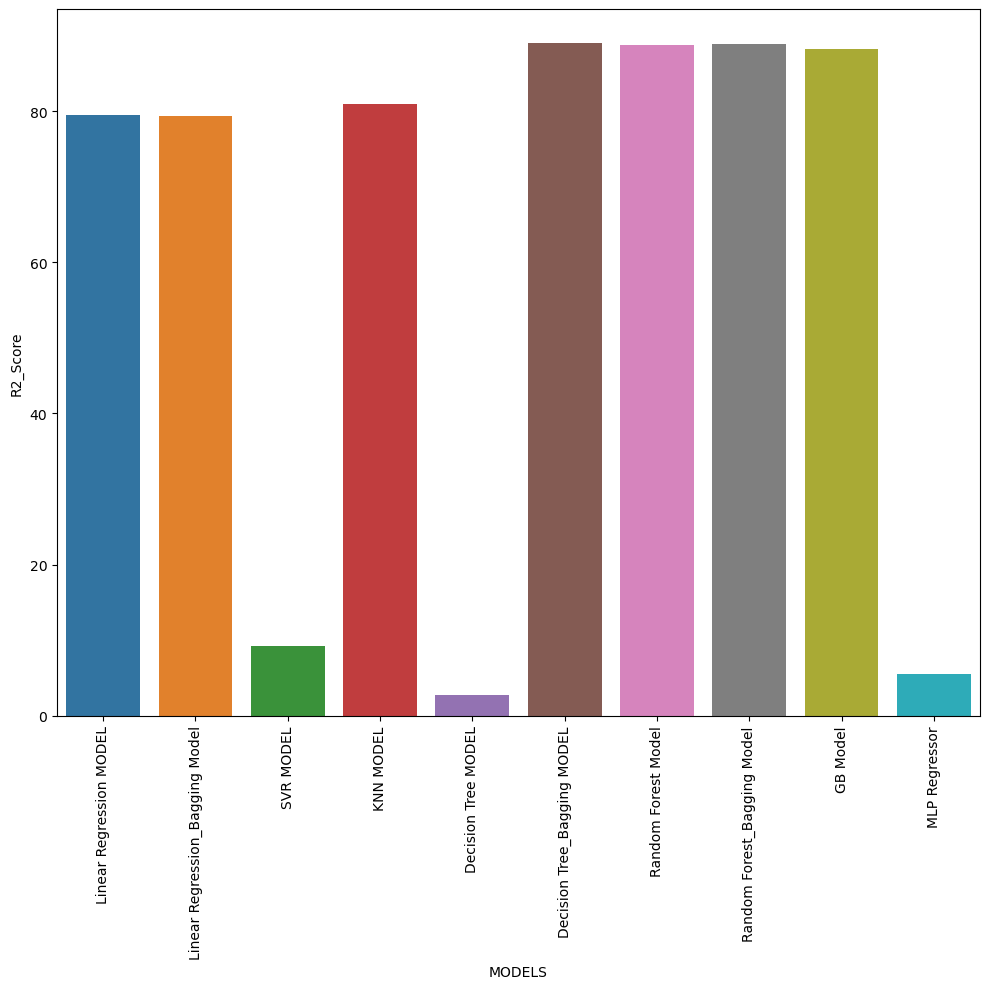

In [207]:
Model=['Linear Regression MODEL','Linear Regression_Bagging Model','SVR MODEL','KNN MODEL','Decision Tree MODEL',
              'Decision Tree_Bagging MODEL','Random Forest Model','Random Forest_Bagging Model','GB Model','MLP Regressor']
testing_r2=[r2*100,r2_bag_lr*100,r2_sr*100,knn_r2*100,dr_gr_r2*100,DT_bagg*100,RF_r2*100,RF_bagg*100,gr_r2*100,MLP_r2*100]


plt.figure(figsize=(10,10))
sns.barplot(x=Model,y=testing_r2)
plt.xticks(rotation=90)
plt.xlabel('MODELS')
plt.ylabel('R2_Score')
plt.tight_layout()

In [208]:
sc_xtest

array([[0.67391304, 1.        , 0.1763519 , 0.        , 0.        ,
        0.66666667],
       [0.23913043, 0.        , 0.25934894, 0.8       , 0.        ,
        0.33333333],
       [0.7173913 , 0.        , 0.54950229, 0.6       , 0.        ,
        0.        ],
       ...,
       [0.58695652, 1.        , 0.118106  , 0.6       , 0.        ,
        1.        ],
       [0.23913043, 1.        , 0.1763519 , 0.6       , 0.        ,
        0.66666667],
       [0.86956522, 0.        , 0.44215765, 0.2       , 0.        ,
        0.66666667]])

In [211]:
y_test

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
           ...     
1014     5383.53600
669      6500.23590
1109     8605.36150
788      5209.57885
1192    13019.16105
Name: charges, Length: 335, dtype: float64

In [ ]:
y_test